In [3]:
import sys
sys.path.append('/home/ardelalegre/SoundMapping/Analysis/Util')
sys.path.append('/home/ardelalegre/SoundMapping/Database')
from DatabaseAPI import DatabaseAPI
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from get_time_interval_data import *
from PCA import *
from Plot import *
import pickle
from sklearn.cluster import KMeans

In [4]:
# clean out NaNs and zeros
def extract_all_active_observations_v2(interval_matrix_data, array_indices):
    # exclude time column
    observations = interval_matrix_data[:,1:]
    selected_obs = np.hstack([observations[:,i*3:i*3+3] for i in array_indices])
    cleaned_data = []
    ind = []
    for i in range(selected_obs.shape[0]):
        if not any(np.isnan(selected_obs[i,:])) and not any(selected_obs[i,:]==0):
            cleaned_data.append(selected_obs[i,:])
            ind.append(i)
    selected_raw_obs = interval_matrix_data[ind,:]        
    return  np.vstack(cleaned_data), selected_raw_obs

## note
Different from previous static point experiments, two arrays are mounted onto the wall: array 0 and 1, and array 2, 3, 5 are mounted to the ceiling. 

In [5]:
pendulum1 = get_time_interval_matrix_data("Dec 18 2020 02:55PM", "Dec 18 2020 03:00PM")
pendulum1_cdata = get_cdata(pendulum1)
projections1 = project_to_eigen_vectors(pendulum1_cdata, 2, EIGEN_VALUES_0819, EIGEN_VECTORS_0819)

/home/ardelalegre/SoundMapping/Analysis/Util/PCA.py:43: RuntimeWarning: Mean of empty slice
  data_mean = np.nanmean(data[:,1:],axis = 0,keepdims = True)


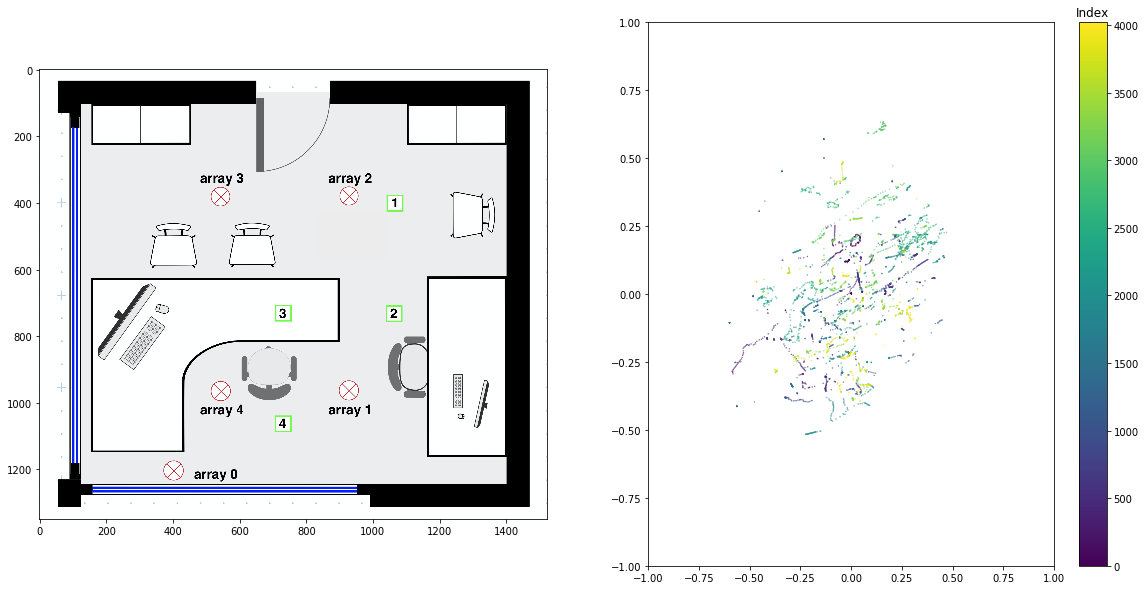

In [7]:
fig = plt.figure(figsize = [20,10])

ax2 = fig.add_subplot(121)
room_model_chair = plt.imread('room_model_v4.png')
ax2.imshow(room_model_chair)

ax = fig.add_subplot(122)
temp = ax.scatter(projections1[:,0], projections1[:,1], c = np.arange(projections1.shape[0]), s=0.1)
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
cbar = fig.colorbar(temp, ax=ax)
cbar.ax.set_title('Index')

plt.show()

In [9]:
pendulum2 = get_time_interval_matrix_data("Dec 18 2020 03:05PM", "Dec 18 2020 03:07PM")
pendulum2_cdata = get_cdata(pendulum2)
projections2 = project_to_eigen_vectors(pendulum2_cdata, 2, EIGEN_VALUES_0819, EIGEN_VECTORS_0819)

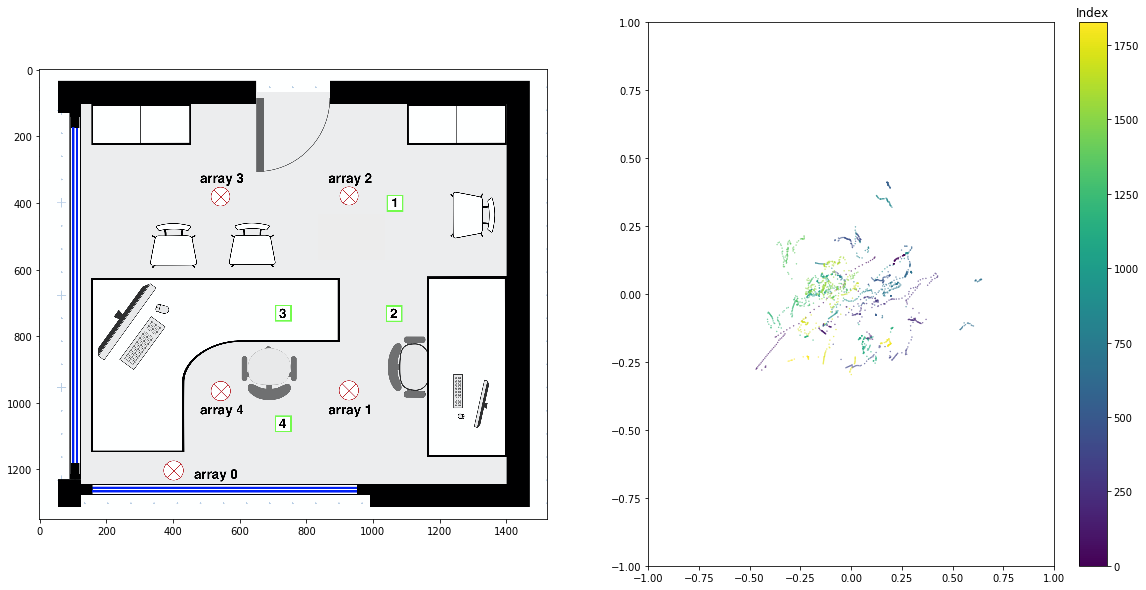

In [10]:
fig = plt.figure(figsize = [20,10])

ax2 = fig.add_subplot(121)
room_model_chair = plt.imread('room_model_v4.png')
ax2.imshow(room_model_chair)

ax = fig.add_subplot(122)
temp = ax.scatter(projections2[:,0], projections2[:,1], c = np.arange(projections2.shape[0]), s=0.1)
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
cbar = fig.colorbar(temp, ax=ax)
cbar.ax.set_title('Index')

plt.show()

In [13]:
pendulum2.shape

(1827, 19)

### data cleaning

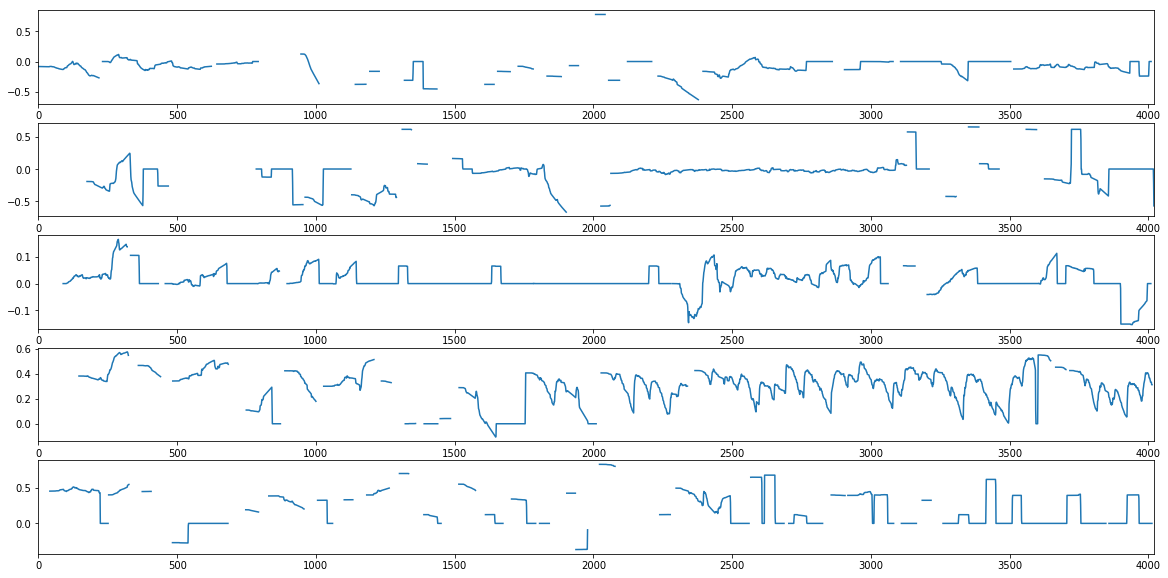

In [12]:
# only plotting x
fig = plt.figure(figsize = [20,10])
ax1 = fig.add_subplot(511)
ax1.plot(pendulum1[:,1])  # array 0
ax1.set_xlim(0,4022)
ax2 = fig.add_subplot(512)
ax2.plot(pendulum1[:,4])  # array 1
ax2.set_xlim(0,4022)
ax3 = fig.add_subplot(513)
ax3.plot(pendulum1[:,7])  # array 2
ax3.set_xlim(0,4022)
ax4 = fig.add_subplot(514)
ax4.plot(pendulum1[:,10]) # array 3
ax4.set_xlim(0,4022)
ax5 = fig.add_subplot(515)
ax5.plot(pendulum1[:,16]) # array 5
ax5.set_xlim(0,4022)
plt.show()

In [20]:
pendulum1_cleaned, pendulum1_og = extract_all_active_observations_v2(pendulum1, [0,1,2,3,5])
selected_cdata1 = get_cdata(pendulum1_og)
projections_selected1 = project_to_eigen_vectors(selected_cdata1, 2, EIGEN_VALUES_0819, EIGEN_VECTORS_0819)

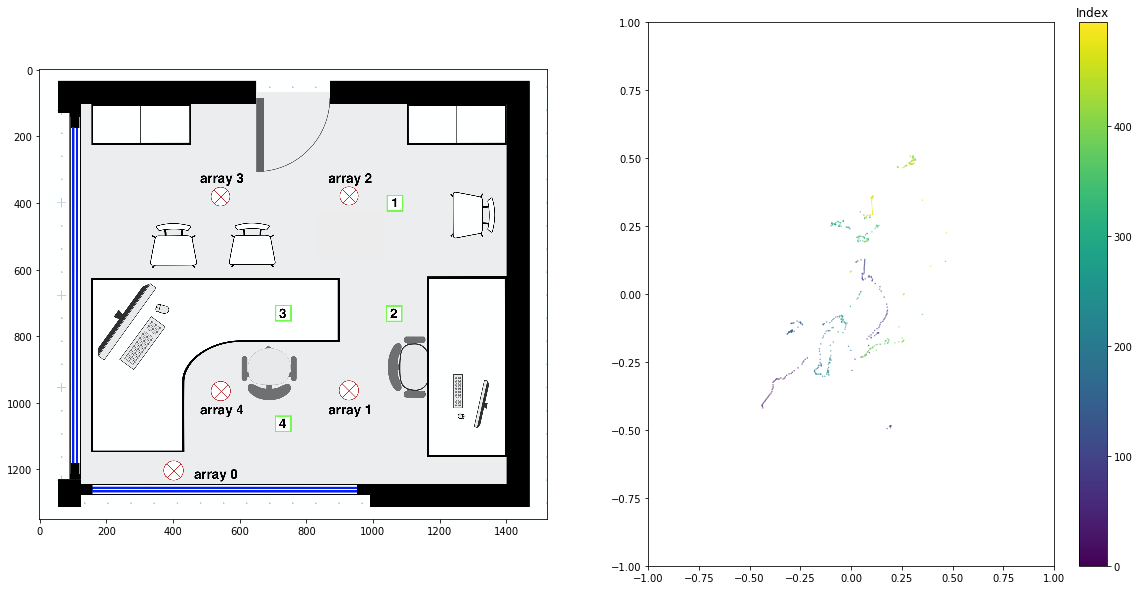

In [21]:
fig = plt.figure(figsize = [20,10])

ax2 = fig.add_subplot(121)
room_model_chair = plt.imread('room_model_v4.png')
ax2.imshow(room_model_chair)

ax = fig.add_subplot(122)
temp = ax.scatter(projections_selected1[:,0], 
                  projections_selected1[:,1], 
                  c = np.arange(projections_selected1.shape[0]), 
                  s=0.1)
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
cbar = fig.colorbar(temp, ax=ax)
cbar.ax.set_title('Index')

plt.show()

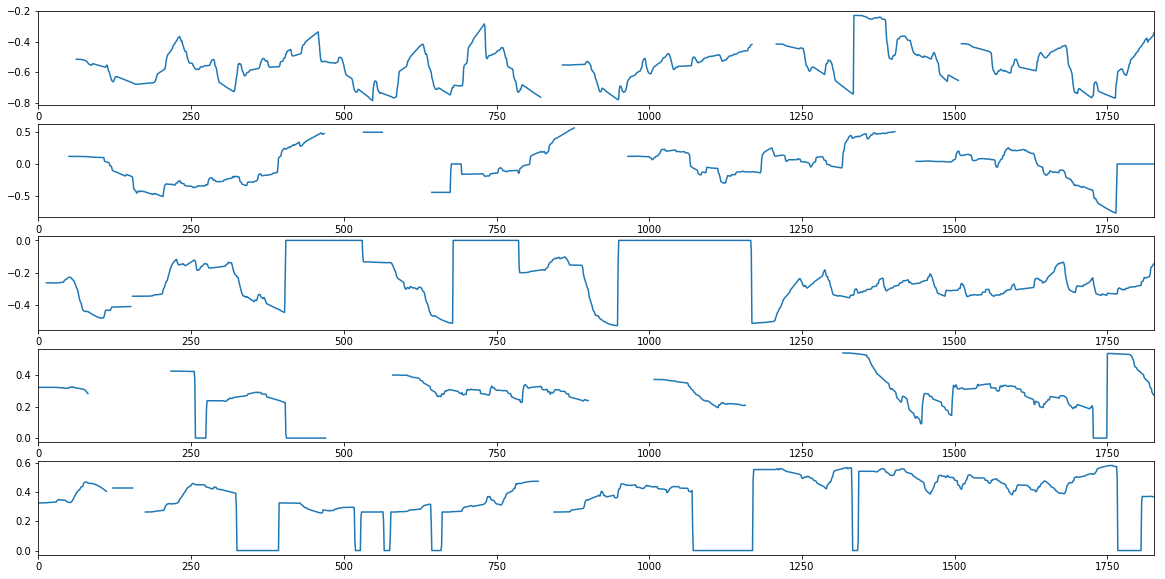

In [14]:
# only plotting x
fig = plt.figure(figsize = [20,10])
ax1 = fig.add_subplot(511)
ax1.plot(pendulum2[:,1])  # array 0
ax1.set_xlim(0,1827)
ax2 = fig.add_subplot(512)
ax2.plot(pendulum2[:,4])  # array 1
ax2.set_xlim(0,1827)
ax3 = fig.add_subplot(513)
ax3.plot(pendulum2[:,7])  # array 2
ax3.set_xlim(0,1827)
ax4 = fig.add_subplot(514)
ax4.plot(pendulum2[:,10]) # array 3
ax4.set_xlim(0,1827)
ax5 = fig.add_subplot(515)
ax5.plot(pendulum2[:,16]) # array 5
ax5.set_xlim(0,1827)
plt.show()

In [18]:
pendulum2_cleaned, pendulum2_og = extract_all_active_observations_v2(pendulum2, [0,1,2,3,5])
selected_cdata2 = get_cdata(pendulum2_og)
projections_selected2 = project_to_eigen_vectors(selected_cdata2, 2, EIGEN_VALUES_0819, EIGEN_VECTORS_0819)

/home/ardelalegre/SoundMapping/Analysis/Util/PCA.py:43: RuntimeWarning: Mean of empty slice
  data_mean = np.nanmean(data[:,1:],axis = 0,keepdims = True)


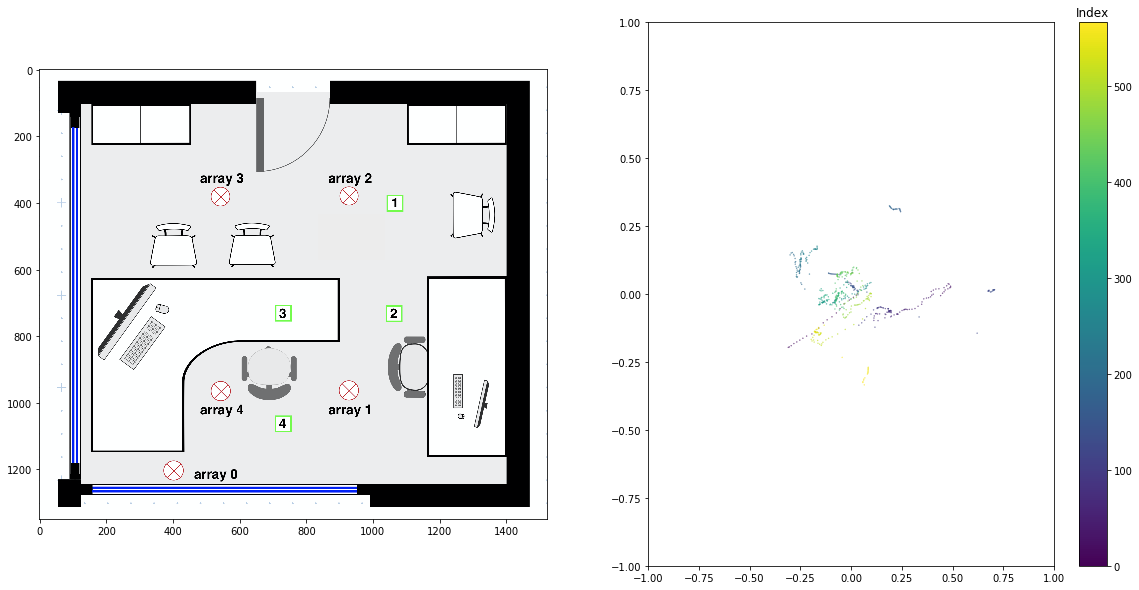

In [19]:
fig = plt.figure(figsize = [20,10])

ax2 = fig.add_subplot(121)
room_model_chair = plt.imread('room_model_v4.png')
ax2.imshow(room_model_chair)

ax = fig.add_subplot(122)
temp = ax.scatter(projections_selected2[:,0], 
                  projections_selected2[:,1], 
                  c = np.arange(projections_selected2.shape[0]), 
                  s=0.1)
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
cbar = fig.colorbar(temp, ax=ax)
cbar.ax.set_title('Index')

plt.show()